# Compute MLD for the 5 grids; determine common time periods where Labrador sea is 'open'

rsync -rv --size-only /work/bm0944/a270062/cpl_output /work/bm0944/a270062/cpl_output_T127aguv /work/bm0944/a270062/cpl_output_T127glob /work/ab0995/a270062/cpl_output_T127bold /mnt/lustre01/work/ab0995/a270046/hierarchy-grids

In [1]:
import sys
sys.path.append('/mnt/lustre01/pf/a/a270046/hierarchy/pyfesom_fork') # ut.py etc. (github)

import matplotlib
#matplotlib.use('Agg') #-- use in batch mode
#matplotlib.use('TkAgg')
from netCDF4 import Dataset, MFDataset
import pyfesom as pf
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from matplotlib import cm
from colorbars import cmap_correlations256

#### CORE2 mesh + data

In [2]:
# load the FESOM mesh
meshname4plots ='COREII'
meshpath  ='/work/bm0944/input/CORE2_final/' # COREII at DKRZ
mesh = pf.load_mesh(meshpath, get3d=False, usepickle=False)

/work/bm0944/input/CORE2_final/pickle_mesh
2
Load 2d part of the grid in 13 second(s)


In [1]:
ls /work/ab0995/a270046/hierarchy-grids/

check_bold/  cpl_output/         cpl_output_T127aguv/  cpl_output_T127glob/
check_glob/  cpl_output_ref87k/  cpl_output_T127bold/  mycaches/


In [3]:
%%bash
ls /work/bm0944/a270062/cpl_output/fesom.{2008,2107}.oce.diag.nc
ls /work/ab0995/a270046/hierarchy-grids/cpl_output/fesom.{2008,2107}.oce.diag.nc

/work/ab0995/a270046/hierarchy-grids/cpl_output/fesom.2008.oce.diag.nc
/work/ab0995/a270046/hierarchy-grids/cpl_output/fesom.2107.oce.diag.nc


ls: cannot access /work/bm0944/a270062/cpl_output/fesom.2008.oce.diag.nc: No such file or directory
ls: cannot access /work/bm0944/a270062/cpl_output/fesom.2107.oce.diag.nc: No such file or directory


In [4]:
%load_ext ipycache

/work/ab0995/a270046/miniconda2-install/lib/python2.7/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated since IPython 4.0. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/work/ab0995/a270046/miniconda2-install/lib/python2.7/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [5]:
%%cache /work/bm0944/a270046/hierarchy_caches/mycache_mld_core.pkl MLD_core_MAR_2008_2107

firstyear=2008
lastyear=2107
filetmp = '/work/bm0944/a270062/cpl_output/fesom.{}.oce.diag.nc' # COREII at DKRZ
#files = [filetmp.format(d) for d in range(2008,2017+1,1)]
files = [filetmp.format(d) for d in range(firstyear,lastyear+1,1)]
fl = MFDataset(files)

#fl.variables.keys()
#[u'time', u'iter', u'mixlay', u'utemp', u'vtemp', u'usalt', u'vsalt', u'Kv']

numy=lastyear-firstyear+1
print(fl.variables['mixlay'].shape)
# (36, 93035)
#print 'Computing mean ...'
#temp = fl.variables['temp'][:,:].mean(axis=0) # 1x 3D field
#salt = fl.variables['salt'][:,:].mean(axis=0) # 1x 3D field
#print 'Done.'

#-- March indices 
MAR = np.arange(2,numy*12,12)

#-- define Labrador area
mask_Labrador=[(mesh.x2>-60) & (mesh.x2<-40) & (mesh.y2 > 52) & (mesh.y2 < 65)]
mask_Labrador=mask_Labrador[0]

print(np.shape(mask_Labrador))

#-- 100-yr Maximum MLD for March in Labrador Sea
MLD_core_MAR_2008_2107=fl.variables['mixlay'][MAR,mask_Labrador].max(axis=1)

print(np.shape(MLD_core_MAR_2008_2107))

[Skipped the cell's code and loaded variables MLD_core_MAR_2008_2107 from file '/work/bm0944/a270046/hierarchy_caches/mycache_mld_core.pkl'.]
(1200, 126859)
(126859,)
(100,)


#### REF mesh + data

In [6]:
# load the FESOM mesh
meshname4plots ='REF'
meshpath  ='/work/bm0944/input/mesh_ref87k/' # REF at DKRZ
mesh = pf.load_mesh(meshpath, get3d=False, usepickle=False)

/work/bm0944/input/mesh_ref87k/pickle_mesh
2
Load 2d part of the grid in 11 second(s)


In [7]:
%%bash
ls /work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/fesom.{1851,1950}.oce.diag.nc

/work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/fesom.1851.oce.diag.nc
/work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/fesom.1950.oce.diag.nc


need to copy oce.diag files for PI ref87k... from where again?

locally at AWI: /csys/nobackup3_CLIDYN/trackow/ECHAM_FESOM/hlrn3_ref87k_piControl (1851--3395)

and I think at HLRN (blogin!) here: /gfs2/work/hbktrack/cpl_output (Erster Teil,1851--2865) /gfs1/work/hbktrack/cpl_output (Zweiter Teil, bis 3395)

TEST: (1950 neu kopiert aus versehen), jetzt 1955
blogin4:/gfs2/work/hbktrack/cpl_output $ cp fesom.1955.oce.mean.nc fesom.1955.oce.mean.checkPIref87k.nc
blogin4:/gfs2/work/hbktrack/cpl_output $ scp fesom.1955.oce.mean.checkPIref87k.nc a270046@mistralpp.dkrz.de:'/work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/.'
Warning: Permanently added the RSA host key for IP address '136.172.50.63' to the list of known hosts.
a270046@mistralpp.dkrz.de's password: 
fesom.1955.oce.mean.checkPIref87k.nc          100%  658MB  41.1MB/s   00:16


diff /work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/fesom.1955.oce.mean.nc /work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/fesom.1955.oce.mean.checkPIref87k.nc

no diff, so

blogin4:/gfs2/work/hbktrack/cpl_output $ scp fesom.{1851..1950}.oce.diag.nc a270046@mistralpp.dkrz.de:'/work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/.'

In [8]:
%%cache /work/bm0944/a270046/hierarchy_caches/mycache_mld_ref87k.pkl MLD_ref87k_MAR_1851_1950

firstyear=1851
lastyear=1950
numy=lastyear-firstyear+1
filetmp = '/work/ab0995/a270046/hierarchy-grids/cpl_output_ref87k/fesom.{}.oce.diag.nc' # REF87K at DKRZ
files = [filetmp.format(d) for d in range(firstyear,lastyear+1,1)]
fl = MFDataset(files)

print(fl.variables['mixlay'].shape)

#-- March indices 
MAR = np.arange(2,numy*12,12)

#-- define Labrador area
mask_Labrador=[(mesh.x2>-60) & (mesh.x2<-40) & (mesh.y2 > 52) & (mesh.y2 < 65)]
mask_Labrador=mask_Labrador[0]

print(np.shape(mask_Labrador))

#-- 100-yr Maximum MLD for March in Labrador Sea
MLD_ref87k_MAR_1851_1950=fl.variables['mixlay'][MAR,mask_Labrador].max(axis=1)

print(np.shape(MLD_ref87k_MAR_1851_1950))

[Skipped the cell's code and loaded variables MLD_ref87k_MAR_1851_1950 from file '/work/bm0944/a270046/hierarchy_caches/mycache_mld_ref87k.pkl'.]
(1200, 86803)
(86803,)
(100,)


#### AGUV mesh + data

In [9]:
# load the FESOM mesh
meshname4plots ='HIGH1'
meshpath  ='/work/bm0944/input/aguv/' # AGUV at DKRZ
mesh = pf.load_mesh(meshpath, abg=[0, 0, 0], get3d=False, usepickle=False)

/work/bm0944/input/aguv/pickle_mesh
2
Load 2d part of the grid in 39 second(s)


In [10]:
%%bash
ls /work/bm0944/a270062/cpl_output_T127aguv/fesom.{2008,2107}.oce.diag.nc
ls /work/ab0995/a270046/hierarchy-grids/cpl_output_T127aguv/fesom.{2008,2107}.oce.diag.nc

/work/ab0995/a270046/hierarchy-grids/cpl_output_T127aguv/fesom.2008.oce.diag.nc
/work/ab0995/a270046/hierarchy-grids/cpl_output_T127aguv/fesom.2107.oce.diag.nc


ls: cannot access /work/bm0944/a270062/cpl_output_T127aguv/fesom.2008.oce.diag.nc: No such file or directory
ls: cannot access /work/bm0944/a270062/cpl_output_T127aguv/fesom.2107.oce.diag.nc: No such file or directory


In [11]:
%%cache /work/bm0944/a270046/hierarchy_caches/mycache_mld_aguv.pkl MLD_aguv_MAR_2008_2107

firstyear=2008
lastyear=2107
numy=lastyear-firstyear+1
filetmp = '/work/bm0944/a270062/cpl_output_T127aguv/fesom.{}.oce.diag.nc' # AGUV at DKRZ
files = [filetmp.format(d) for d in range(firstyear,lastyear+1,1)]
fl = MFDataset(files)

print(fl.variables['mixlay'].shape)

#-- March indices 
MAR = np.arange(2,numy*12,12)

#-- define Labrador area
mask_Labrador=[(mesh.x2>-60) & (mesh.x2<-40) & (mesh.y2 > 52) & (mesh.y2 < 65)]
mask_Labrador=mask_Labrador[0]

print(np.shape(mask_Labrador))

#-- 100-yr Maximum MLD for March in Labrador Sea
MLD_aguv_MAR_2008_2107=fl.variables['mixlay'][MAR,mask_Labrador].max(axis=1)

print(np.shape(MLD_aguv_MAR_2008_2107))

[Skipped the cell's code and loaded variables MLD_aguv_MAR_2008_2107 from file '/work/bm0944/a270046/hierarchy_caches/mycache_mld_aguv.pkl'.]
(1200, 810471)
(810471,)
(100,)


#### GLOB mesh + data

In [12]:
# load the FESOM mesh
meshname4plots ='HIGH2'
meshpath  ='/work/ab0995/a270046/fesom-meshes/glob/' # GLOB at DKRZ
mesh = pf.load_mesh(meshpath, abg=[0, 0, 0], get3d=False, usepickle=False)

/work/ab0995/a270046/fesom-meshes/glob/pickle_mesh
2
Load 2d part of the grid in 39 second(s)


In [13]:
%%bash
ls /work/bm0944/a270062/cpl_output_T127glob/fesom.{2008,2107}.oce.diag.nc
ls /work/ab0995/a270046/hierarchy-grids/cpl_output_T127glob/fesom.{2008,2107}.oce.diag.nc

/work/ab0995/a270046/hierarchy-grids/cpl_output_T127glob/fesom.2008.oce.diag.nc
/work/ab0995/a270046/hierarchy-grids/cpl_output_T127glob/fesom.2107.oce.diag.nc


ls: cannot access /work/bm0944/a270062/cpl_output_T127glob/fesom.2008.oce.diag.nc: No such file or directory
ls: cannot access /work/bm0944/a270062/cpl_output_T127glob/fesom.2107.oce.diag.nc: No such file or directory


In [14]:
%%cache /work/bm0944/a270046/hierarchy_caches/mycache_mld_glob.pkl MLD_glob_MAR_2008_2107

firstyear=2008
lastyear=2107
numy=lastyear-firstyear+1
filetmp = '/work/bm0944/a270062/cpl_output_T127glob/fesom.{}.oce.diag.nc' # GLOB at DKRZ
files = [filetmp.format(d) for d in range(firstyear,lastyear+1,1)]
fl = MFDataset(files)

print(fl.variables['mixlay'].shape)

#-- March indices 
MAR = np.arange(2,numy*12,12)

#-- define Labrador area
mask_Labrador=[(mesh.x2>-60) & (mesh.x2<-40) & (mesh.y2 > 52) & (mesh.y2 < 65)]
mask_Labrador=mask_Labrador[0]

print(np.shape(mask_Labrador))

#-- 100-yr Maximum MLD for March in Labrador Sea
MLD_glob_MAR_2008_2107=fl.variables['mixlay'][MAR,mask_Labrador].max(axis=1)

print(np.shape(MLD_glob_MAR_2008_2107))

[Skipped the cell's code and loaded variables MLD_glob_MAR_2008_2107 from file '/work/bm0944/a270046/hierarchy_caches/mycache_mld_glob.pkl'.]
(1200, 830305)
(830305,)
(100,)


#### BOLD mesh + data

In [15]:
# load the FESOM mesh
meshname4plots ='BOLD'
meshpath  ='/work/ab0995/a270067/fesom/bold/mesh_Agulhas/' # BOLD at DKRZ
mesh = pf.load_mesh(meshpath, abg=[0, 0, 0], get3d=False, usepickle=False)

/work/ab0995/a270067/fesom/bold/mesh_Agulhas/pickle_mesh
2
Load 2d part of the grid in 46 second(s)


In [16]:
%%bash
ls /work/ab0995/a270062/cpl_output_T127bold/fesom.{2008,2107}.oce.diag.nc
ls /work/ab0995/a270046/hierarchy-grids/cpl_output_T127bold/fesom.{2008,2107}.oce.diag.nc

/work/ab0995/a270046/hierarchy-grids/cpl_output_T127bold/fesom.2008.oce.diag.nc
/work/ab0995/a270046/hierarchy-grids/cpl_output_T127bold/fesom.2107.oce.diag.nc


ls: cannot access /work/ab0995/a270062/cpl_output_T127bold/fesom.2008.oce.diag.nc: No such file or directory
ls: cannot access /work/ab0995/a270062/cpl_output_T127bold/fesom.2107.oce.diag.nc: No such file or directory


In [17]:
%%cache /work/bm0944/a270046/hierarchy_caches/mycache_mld_bold.pkl MLD_bold_MAR_2008_2107

firstyear=2008
lastyear=2107
numy=lastyear-firstyear+1
filetmp = '/work/ab0995/a270062/cpl_output_T127bold/fesom.{}.oce.diag.nc' # BOLD at DKRZ
files = [filetmp.format(d) for d in range(firstyear,lastyear+1,1)]
#print(files)
fl = MFDataset(files)

print(fl.variables['mixlay'].shape)

#-- March indices 
MAR = np.arange(2,numy*12,12)

#-- define Labrador area
mask_Labrador=[(mesh.x2>-60) & (mesh.x2<-40) & (mesh.y2 > 52) & (mesh.y2 < 65)]
mask_Labrador=mask_Labrador[0]

print(np.shape(mask_Labrador))

#-- 100-yr Maximum MLD for March in Labrador Sea
MLD_bold_MAR_2008_2107=fl.variables['mixlay'][MAR,mask_Labrador].max(axis=1)

print(np.shape(MLD_bold_MAR_2008_2107))

[Skipped the cell's code and loaded variables MLD_bold_MAR_2008_2107 from file '/work/bm0944/a270046/hierarchy_caches/mycache_mld_bold.pkl'.]
(1200, 1306775)
(1306775,)
(100,)


## Plot everything

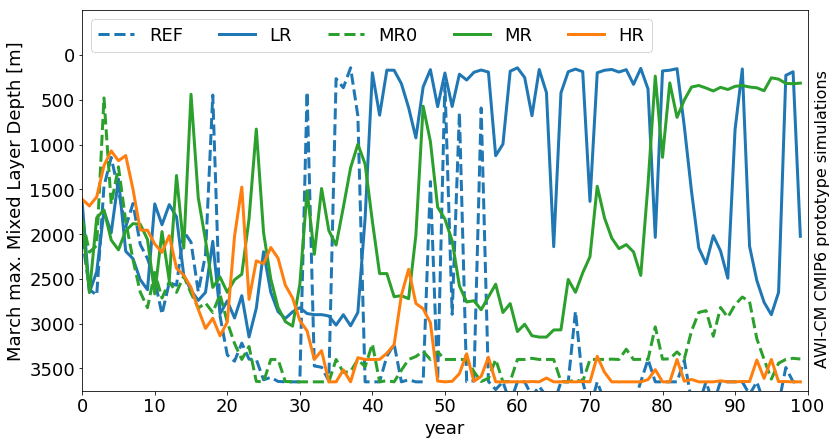

In [22]:
from scipy import stats

#-- Generated linear fit
#slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
#line = slope*xi+intercept

#-- plot everything together
fig=plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)

xi_year=np.arange(0,100,1)

#---- ref more data needed, copy from HLRN MLD_ref87k_MAR_1851_1950
plt.plot(xi_year, MLD_ref87k_MAR_1851_1950, color='C0',linewidth=3.,label='REF', linestyle='--')

#---- core
plt.plot(xi_year, MLD_core_MAR_2008_2107, color='C0',linewidth=3.,label='LR') # original data

#---- aguv
plt.plot(xi_year, MLD_aguv_MAR_2008_2107, color='C2',linewidth=3.,label='MR0', linestyle='--') # AGUV

#---- glob
plt.plot(xi_year, MLD_glob_MAR_2008_2107, color='C2',linewidth=3.,label='MR') # GLOB

#---- bold
plt.plot(xi_year, MLD_bold_MAR_2008_2107, color='C1',linewidth=3.,label='HR') # GLOB

#plt.plot(xi, line, color='blue',linewidth=3.) # trend
#plt.text(27,7.5,str(slope.round(3)*10)+' million sq. km / decade',color='blue',fontsize=16)

plt.ylabel('March max. Mixed Layer Depth [m]',fontsize=18)
plt.xlabel('year',fontsize=18)

plt.xticks(np.arange(0,110,10),np.arange(0,110,10),fontsize=18,rotation=0)
plt.axis([0,100,-500,3750]) # [xmin, xmax, ymin, ymax]
plt.yticks([0,500,1000,1500,2000,2500,3000,3500], fontsize = 18)

#plt.title('Average Monthly Arctic Sea Ice Extent\nSeptember 1950-2098',fontsize=22)
plt.text(101, 300, 'AWI-CM CMIP6 prototype simulations', rotation=90, fontsize=16)
plt.legend(loc='upper left', ncol=5, fontsize=18)

plt.gca().invert_yaxis() # depth downward

plt.show()

In [23]:
saveFIG=True
if saveFIG==True:
   pp = PdfPages('/pf/a/a270046/hierarchy/figuresJuly2018/MLD_MAR_Labrador_100years_newcolors.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()